# Subject Demographics Exploration

This Jupyter Notebook explores the demographics of subjects in a project, focusing on their gender distribution and age ranges. The notebook retrieves the gender and age information for each subject with [XNATpy](https://xnat.readthedocs.io/en/latest/) and presents the findings through a histogram and a pie chart.

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xnat

In [3]:
if os.environ['XNAT_XSI_TYPE'] != 'xnat:projectData':
    raise Exception('Manually enter your project id')

project_id = os.environ['XNAT_ITEM_ID']

connection = xnat.connect()
project = connection.projects[project_id]

In [4]:
subject_data = {
    'id': [],
    'gender': [],
    'age': []
}

for subject in project.subjects.values():
    subject_data['id'].append(subject.label)
    subject_data['gender'].append(subject.demographics.gender)
    subject_data['age'].append(subject.demographics.age)
    
df = pd.DataFrame(subject_data)

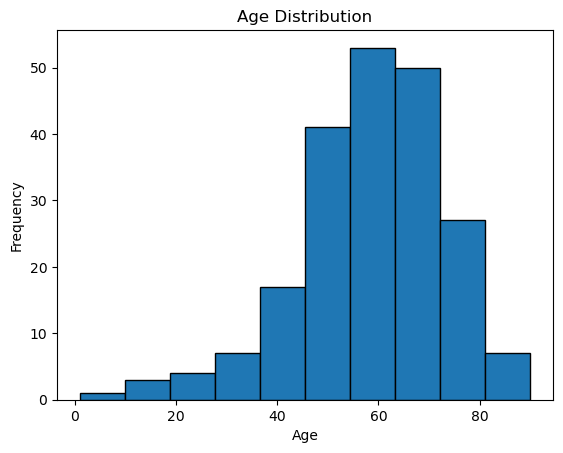

In [5]:
ages = df['age']

# Create the histogram
plt.hist(ages, bins=10, edgecolor='black')

# Set the labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

# Display the histogram
plt.show()

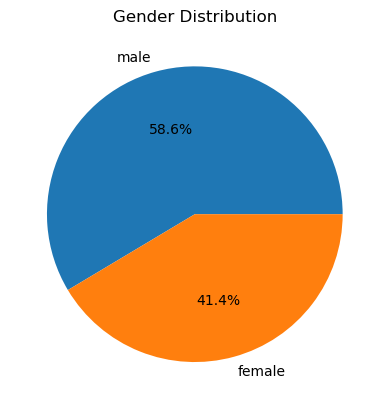

In [6]:
genders = df['gender'].value_counts()

# Create the pie chart
plt.pie(genders, labels=genders.index, autopct='%1.1f%%')

# Set the title
plt.title('Gender Distribution')

# Display the pie chart
plt.show()